In [755]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd



In [756]:
df = pd.read_csv("student_scores.csv")

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [757]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [758]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [759]:
class LinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0
        self.error = 0
        self.__X__ = 0
        self.__Y__ = 0


    def fit(self, x, y, m=0, b=0, learning_rate=0.01, epoch=100):
        n = float(len(x))
        self.__X__ = x
        self.__Y__ = y
        self.m = m
        self.b = b
        for i in range (epoch):
            y_current = self.m * x + self.b
            self.error = sum((y - y_current)**2) / n
            m_gradient = -(2/n) * sum(x *(y-y_current))
            b_gradient = -(2/n) * sum(y-y_current)
            self.m = self.m - learning_rate * m_gradient
            self.b = self.b - learning_rate * b_gradient

    def predict(self, x):
        if (self.m == 0 and self.b == 0):
            return "data still not be trained"
        
        return self.m * x + self.b
    
    def predict_all(self):
        if (self.m == 0 and self.b == 0):
            return "data still not be trained"
        
        return self.m * self.__X__ + self.b

    def scores(self, y_true, y_pred):
        ss_res = sum((y_true - y_pred)**2)
        ss_tot = sum((y_true - np.average(y_true))**2)

        return 1 - ss_res / ss_tot


In [760]:
def Train_Test_Split(x, y, test_size=0.2, random_seed=None):
    n = len(x)
    if random_seed:
        np.random.seed(random_seed)

    test_size = int(n * test_size)

    indices = np.random.permutation(n)

    test_indices = indices[:test_size]

    train_indices = indices[test_size:]

    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return x_train, x_test, y_train, y_test

In [761]:
x = np.array(df.Hours.array) 
y = np.array(df.Scores.array)

# x = np.array([i for i in range(1, 11)])
# y = np.array([270, 350, 500, 700, 800, 850, 900, 900, 1000, 1200])

# x[0]

In [762]:
X_train, X_test, y_train, y_test = Train_Test_Split(x, y, 0.2, 42)

In [763]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train, learning_rate=0.0001, epoch=10000)

In [764]:
linear_regression.m,linear_regression.b

(9.815911054935755, 1.9995213408011252)

In [765]:
train_scores = linear_regression.scores(y_train, linear_regression.predict(X_train))

"the predict train scores : " + str(train_scores * 100 )[:5] +"%"

'the predict train scores : 94.88%'

In [766]:
test_scores = linear_regression.scores(y_test, linear_regression.predict(X_test))

"the predict test scores : " + str(test_scores * 100 )[:5] +"%"

'the predict test scores : 96.85%'

In [767]:
# len(x)

<Axes: >

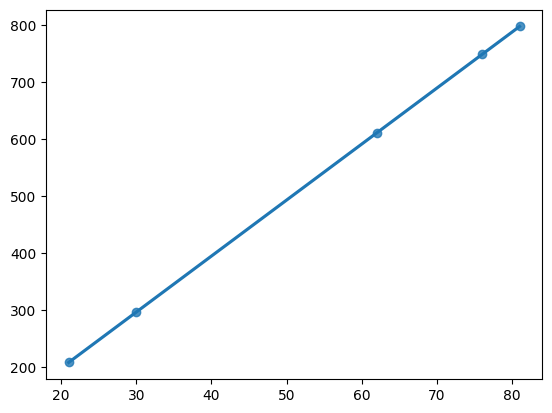

In [768]:
sns.regplot(x=y_test, y=linear_regression.predict(y_test))

ValueError: x and y must have same first dimension, but have shapes (5,) and (20,)

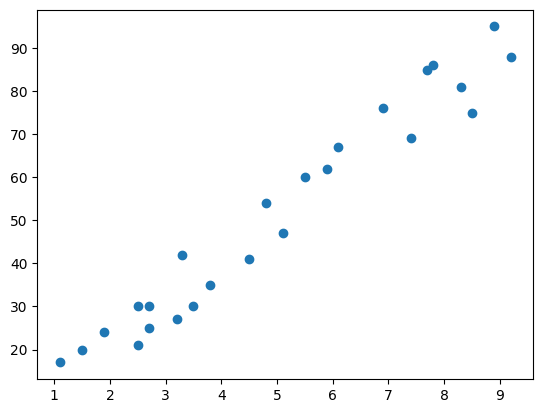

In [769]:
# linear_regression.predict(4)
plt.scatter(x, y)
plt.plot(y_test, linear_regression.predict_all())
plt.xlabel("hours")
plt.ylabel("scores")